<a href="https://colab.research.google.com/github/sophieaea/node_test1/blob/main/Contrast_45_degree_TSPCM_%EC%A3%BC%EC%84%9D%ED%8F%AC%ED%95%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
im = Image.open('/content/45degree.png').convert('L')
data = np.array(im)
print(data.shape)

(65, 65)


In [4]:
np.min(im), np.max(im)

(0, 255)

In [8]:
image_pil = Image.open('/content/45degree.png').convert("L")
image_pil = image_pil.crop((0,0,65,65))
image_black = np.array(image_pil)
image_black.shape

(65, 65)

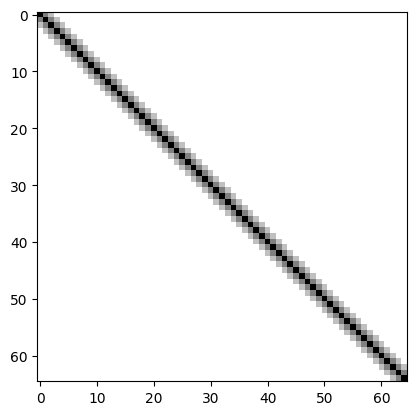

In [9]:
plt.imshow(image_black, 'gray')
plt.show()

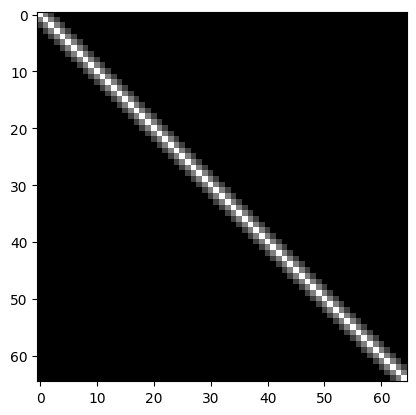

In [10]:
normal_image = np.array(image_black)
normal_image = 1-(normal_image / 255)
plt.imshow(normal_image, 'gray')
plt.show()

In [12]:
a = np.reshape(normal_image,(1,4225))
print("a ndarray: \n", a)
print(a[0][15])

a ndarray: 
 [[1.         0.49803922 0.24705882 ... 0.24705882 0.49803922 1.        ]]
0.0


In [13]:
b1 = np.eye(100)
print(b1)
b2 = 1-b1
print(b2)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[[0. 1. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]


In [14]:
c1 = b1.reshape(10000,1)
c2 = b2.reshape(10000,1)
print(c1)
print(c2)

[[1.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [1.]]
[[0.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [0.]]


In [25]:
i = 0 # input pixel 값이 0.6 이하일때는 자동으로 필터링시키는 if문
while i < 65:
    if a[0, i] < 0.6 and c1[i, 0] == 1:
        c1[i, 0] = 0
    if a[0, i] < 0.6 and c2[i, 0] == 1:
        c2[i, 0] = 0
    else:
      pass
    i += 1

In [24]:
result = a.dot(c1)-a.dot(c2)

ValueError: ignored